There are 3 notebooks related with the linear regression. Two of them are trying to predict google stocks based on meta, then meta based on google and then google based on its own data. The first one is meta stocks predicted by google data.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [3]:
# Load
google_data = pd.read_csv("../GOOGL_stock_data.csv", parse_dates=["Date"])
meta_data = pd.read_csv("../META_stock_data.csv", parse_dates=["Date"])

# Create lag features and moving averages for Google data
google_data["Lag_1_google"] = google_data["Close"].shift(1)
google_data["Lag_2_google"] = google_data["Close"].shift(2)
google_data["50_MA_google"] = google_data["Close"].rolling(window=50).mean()
google_data["200_MA_google"] = google_data["Close"].rolling(window=200).mean()

# Drop missing values in Google data
google_data.dropna(inplace=True)

# Merge Google and Meta datasets based on dates
combined_data = pd.merge(meta_data, google_data, on="Date", suffixes=("_meta", "_google"))


In [4]:
# Define features (X) and target (y)
X = combined_data[["Lag_1_google", "Lag_2_google", "50_MA_google", "200_MA_google"]]
y = combined_data["Close_meta"]

# Ensure no missing values remain in the combined dataset
print(f"Shape of combined data: {combined_data.shape}")


Shape of combined data: (2935, 17)


In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (2348, 4), Testing data: (587, 4)


In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)


In [8]:
# Calculate RMSE and MAPE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


RMSE: 84.83627854606634
MAPE: 0.22878007912070844


c:\Users\siwma\Desktop\Uni\cloudaislay\MEM\.venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE indicates the average deviation of predicted stock prices from actual values in the same unit. A lower value would be preffered, for better accuracy. The MAPE indicates that the predictions are, on average, 23% off from the actual stock prices.
So the model based on google shows meta's moderate accuracy with room for improvement.

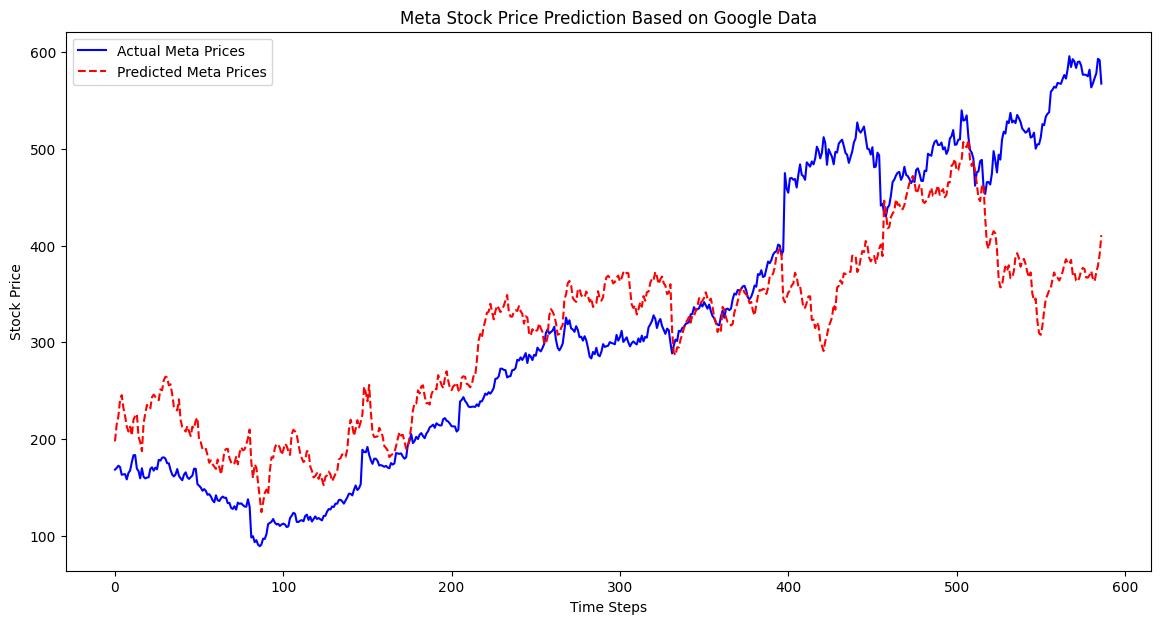

In [9]:
# Plot predictions vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label="Actual Meta Prices", color="blue")
plt.plot(y_pred, label="Predicted Meta Prices", color="red", linestyle="--")
plt.title("Meta Stock Price Prediction Based on Google Data")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
